In [25]:
import numpy as np
from scipy import io
%pylab inline
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import scipy.ndimage
from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import h5py
import matplotlib.pyplot as plt
from nilearn import plotting
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [3]:
pwd

u'/home/chenxupeng/projects/computneuron/HW1'

question3

In [4]:
data_raw = io.loadmat('HW1_data/R15N111_Raw.mat')
data_spk = io.loadmat('HW1_data/R15N111_Spikes.mat')
data_stm = io.loadmat('HW1_data/R15N111_Stimulus.mat')

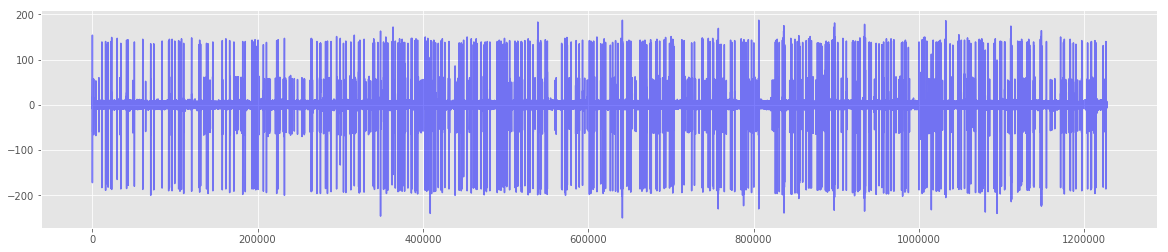

In [5]:
fig, ax = plt.subplots(figsize = (20,4))
ax.plot(data_raw['wave'].ravel()[:],'blue',alpha=0.5)

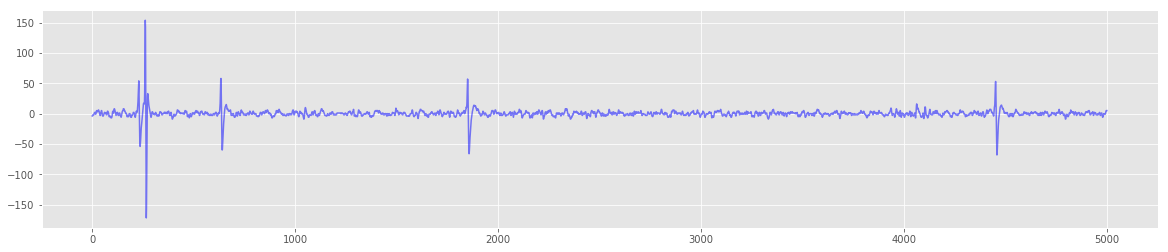

In [6]:
fig, ax = plt.subplots(figsize = (20,4))
ax.plot(data_raw['wave'].ravel()[:5000],'blue',alpha=0.5)

In [7]:
data_raw['wave'].ravel()[265]

-136

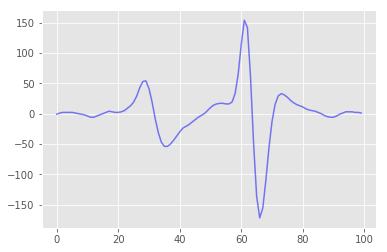

In [8]:
plt.plot(data_raw['wave'].ravel()[200:300],'blue',alpha=0.5)

In [9]:
print data_spk['unit1'].shape[0]
print data_spk['unit2'].shape[0]

503
532


In [10]:
for i in range(20):
    print data_raw['wave'].ravel()[np.floor(24414.0625 * data_spk['unit1'][i][0]).astype('int')]

-54
-53
-58
-59
-53
-58
-52
-55
-58
-61
-56
-53
-56
-53
-56
-52
-62
-58
-54
-60


In [11]:
data_spk['unit1'].ravel()

array([  9.62560000e-03,   2.61734400e-02,   7.59808000e-02,
         1.82517760e-01,   3.34356480e-01,   7.49813760e-01,
         9.28153600e-01,   9.33396480e-01,   1.23813888e+00,
         1.36974336e+00,   2.01019392e+00,   2.64912896e+00,
         2.92077568e+00,   3.83221760e+00,   4.53775360e+00,
         5.32701184e+00,   5.52919040e+00,   5.57420544e+00,
         5.61664000e+00,   5.62147328e+00,   5.74681088e+00,
         5.83704576e+00,   5.96877312e+00,   6.46529024e+00,
         6.82356736e+00,   6.84228608e+00,   7.10443008e+00,
         7.16668928e+00,   7.18983168e+00,   7.24062208e+00,
         7.37665024e+00,   7.41412864e+00,   7.46565632e+00,
         7.53119232e+00,   7.53483776e+00,   8.05289984e+00,
         8.10815488e+00,   8.26974208e+00,   8.27203584e+00,
         8.50268160e+00,   8.53458944e+00,   8.71809024e+00,
         8.79116288e+00,   8.82446336e+00,   9.08152832e+00,
         9.21444352e+00,   9.28669696e+00,   9.29890304e+00,
         9.47097600e+00,

In [12]:
data_stm.keys()

['sti_onset', 'freqs', '__header__', '__globals__', 'levels', '__version__']

In [13]:
print data_stm['sti_onset'].shape[0]
print data_stm['freqs'].shape[0]
print data_stm['levels'].shape[0]

189
189
189


In [49]:
data_stm['sti_onset']

array([[  6.43730164e-06],
       [  2.50003099e-01],
       [  5.00000000e-01],
       [  7.49996901e-01],
       [  9.99993563e-01],
       [  1.24999046e+00],
       [  1.49998713e+00],
       [  1.74998403e+00],
       [  1.99998069e+00],
       [  2.24997759e+00],
       [  2.49997449e+00],
       [  2.74997115e+00],
       [  2.99996805e+00],
       [  3.24996471e+00],
       [  3.49996161e+00],
       [  3.74995852e+00],
       [  3.99995518e+00],
       [  4.24995208e+00],
       [  4.49994874e+00],
       [  4.74994564e+00],
       [  4.99994230e+00],
       [  5.24993920e+00],
       [  5.49993610e+00],
       [  5.74993277e+00],
       [  5.99992967e+00],
       [  6.24992633e+00],
       [  6.49992323e+00],
       [  6.74991989e+00],
       [  6.99991679e+00],
       [  7.24991369e+00],
       [  7.49991035e+00],
       [  7.74990726e+00],
       [  7.99990392e+00],
       [  8.24990082e+00],
       [  8.49989772e+00],
       [  8.74989438e+00],
       [  8.99989128e+00],
 

3(c)

In [48]:
data_stm['sti_onset'].shape

(189, 1)

In [72]:
data_stm['sti_onset']

array([[  6.43730164e-06],
       [  2.50003099e-01],
       [  5.00000000e-01],
       [  7.49996901e-01],
       [  9.99993563e-01],
       [  1.24999046e+00],
       [  1.49998713e+00],
       [  1.74998403e+00],
       [  1.99998069e+00],
       [  2.24997759e+00],
       [  2.49997449e+00],
       [  2.74997115e+00],
       [  2.99996805e+00],
       [  3.24996471e+00],
       [  3.49996161e+00],
       [  3.74995852e+00],
       [  3.99995518e+00],
       [  4.24995208e+00],
       [  4.49994874e+00],
       [  4.74994564e+00],
       [  4.99994230e+00],
       [  5.24993920e+00],
       [  5.49993610e+00],
       [  5.74993277e+00],
       [  5.99992967e+00],
       [  6.24992633e+00],
       [  6.49992323e+00],
       [  6.74991989e+00],
       [  6.99991679e+00],
       [  7.24991369e+00],
       [  7.49991035e+00],
       [  7.74990726e+00],
       [  7.99990392e+00],
       [  8.24990082e+00],
       [  8.49989772e+00],
       [  8.74989438e+00],
       [  8.99989128e+00],
 

In [92]:
def countspike(stimdata,spikedata,op = None):
    '''
    stimdata:data_stm['sti_onset']
    spikedata:data_spk['unit1'].ravel()
    '''
    countlist = []
    for i in range(stimdata.shape[0]-1):
        countlist.append((np.where(np.logical_and(
            spikedata>=stimdata[i], spikedata<stimdata[i]+0.05))[0].shape[0])/0.05)
    if op == None:
        countlist.append(0)
    else:
        countlist.append(np.where(spikedata>=stimdata[stimdata.shape[0]-1])[0].shape[0])
    return np.array(countlist)

In [93]:
print np.unique(data_stm['freqs']).shape[0]
print np.unique(data_stm['levels']).shape[0]

21
9


In [94]:
np.unique(data_stm['freqs'])

array([ 20000.        ,  21129.34960938,  22322.4609375 ,  23582.94921875,
        24914.61914062,  26321.48046875,  27807.77929688,  29378.00976562,
        31036.91015625,  32789.48046875,  34641.01953125,  36597.1015625 ,
        38663.640625  ,  40846.87109375,  43153.390625  ,  45590.140625  ,
        48164.48828125,  50884.2109375 ,  53757.51171875,  56793.05078125,
        60000.        ])

In [95]:
np.unique(data_stm['levels'])

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40], dtype=uint8)

In [96]:
def generate_fra(fres,lev,spkcount):
    '''
    fres data_stm['freqs']   189 unique 21
    lev  data_stm['levels']  189 unique 9
    spkcount  countlist      189 (countlist 1 and 2)
    '''
    fraarray = np.ndarray([9,21])
    for i in range(189):
        ind2 = np.where(np.unique(fres) ==fres[i])[0]
        ind1 = np.where(np.unique(lev) ==lev[i])[0]
        fraarray[ind1,ind2] = spkcount[i]
    fraarr = np.ndarray([18,21])
    for i in range(9):
        fraarr[i*2] = fraarray[i]
        fraarr[i*2+1] = fraarray[i]
    return np.flipud(fraarr)

In [97]:
fra = {}
countlist = {}
for i in range(2):
    countlist[i] = countspike(data_stm['sti_onset'],data_spk['unit'+str(i+1)].ravel())
    fra[i] = generate_fra(data_stm['freqs'],data_stm['levels'],countlist[i])

In [98]:
generate_fra(data_stm['freqs'],data_stm['levels'],countlist[0]).shape

(18, 21)

In [99]:
#特定强度下的tuning curve： 每个level 21个频率？  横坐标频率 纵坐标firing rate hz
# countlist[0]
#data_stm['freqs'][:21]
np.unique(data_stm['levels'],return_counts=True)

(array([ 0,  5, 10, 15, 20, 25, 30, 35, 40], dtype=uint8),
 array([21, 21, 21, 21, 21, 21, 21, 21, 21]))

In [100]:
freq_label = data_stm['freqs'][:21].ravel()[np.argsort(data_stm['freqs'][:21].ravel())]/1000.
np.round(freq_label,1)

array([ 20. ,  21.1,  22.3,  23.6,  24.9,  26.3,  27.8,  29.4,  31. ,
        32.8,  34.6,  36.6,  38.7,  40.8,  43.2,  45.6,  48.2,  50.9,
        53.8,  56.8,  60. ])

In [101]:
fra[0].shape

(18, 21)

In [102]:
np.argsort(data_stm['freqs'][:21].ravel())

array([13,  4,  5, 15, 17, 10, 11,  6, 14, 19, 12, 18,  8,  7,  3,  9,  2,
        1,  0, 16, 20])

Text(0.5,0,u'Frequency (kHz)')

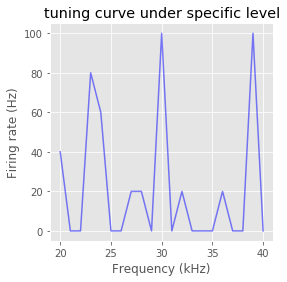

In [103]:
fig, ax = plt.subplots(figsize = (4,4))
ax.plot(fra[0][5][np.argsort(data_stm['freqs'][:21].ravel())],'blue',alpha=0.5)
ax.set_xticklabels(np.arange(15,65,5))
ax.set_title('tuning curve under specific level')
ax.set_ylabel('Firing rate (Hz)')
ax.set_xlabel('Frequency (kHz)')

In [104]:
fra[0].shape

(18, 21)

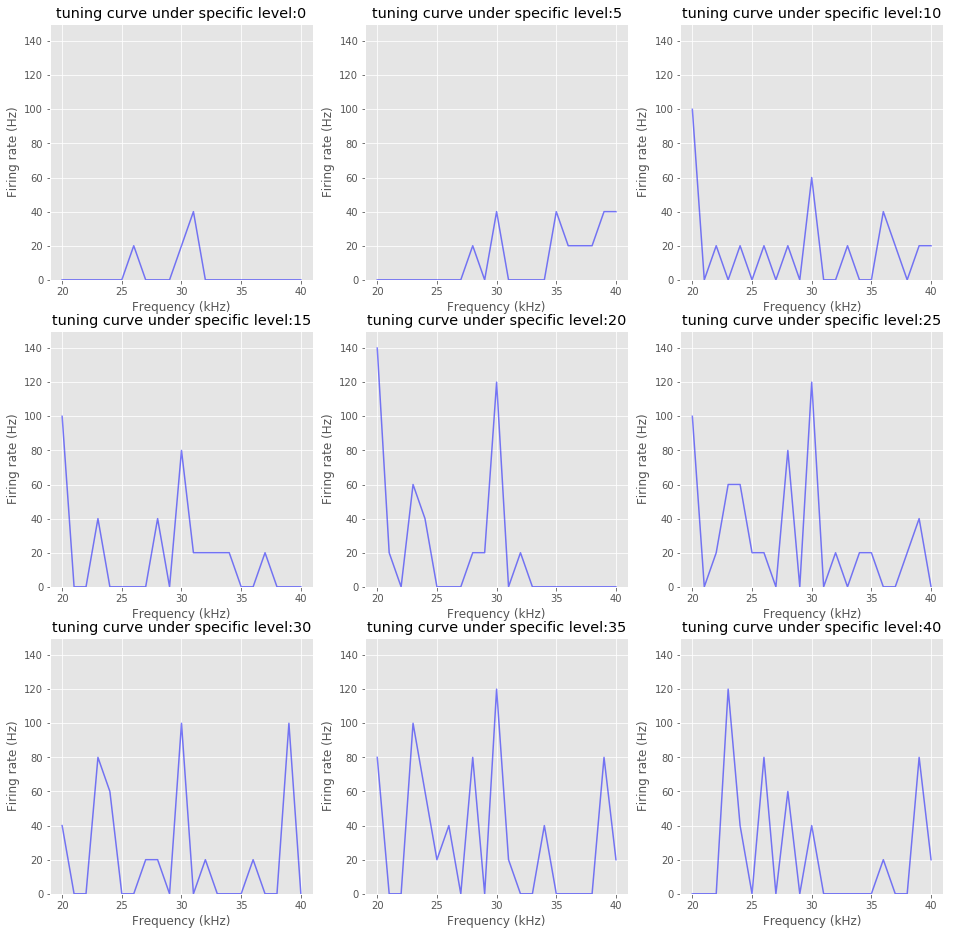

In [110]:
fig, ax = plt.subplots(3,3,figsize = (16,16))
for i in range(3):
    for j in range(3):
        ax[i,j].plot(np.flipud(fra[0])[2*(3*i+j)][np.argsort(data_stm['freqs'][:21].ravel())],'blue',alpha=0.5)
        ax[i,j].set_xticklabels(np.arange(15,65,5))
        ax[i,j].set_title('tuning curve under specific level:' +str(5*(i*3+j)))
        ax[i,j].set_ylabel('Firing rate (Hz)')
        ax[i,j].set_ylim(0,150)
        ax[i,j].set_xlabel('Frequency (kHz)')

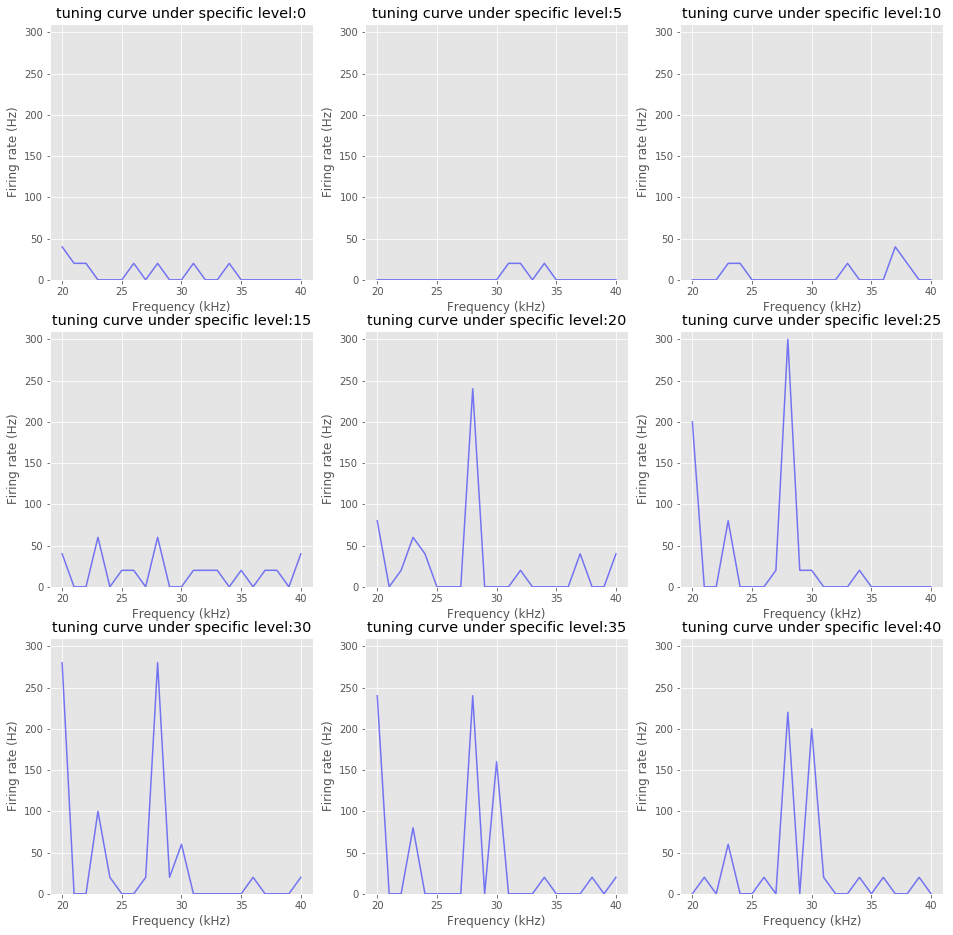

In [115]:
fig, ax = plt.subplots(3,3,figsize = (16,16))
for i in range(3):
    for j in range(3):
        ax[i,j].plot(np.flipud(fra[1])[2*(3*i+j)][np.argsort(data_stm['freqs'][:21].ravel())],'blue',alpha=0.5)
        ax[i,j].set_xticklabels(np.arange(15,65,5))
        ax[i,j].set_title('tuning curve under specific level:' +str(5*(i*3+j)))
        ax[i,j].set_ylabel('Firing rate (Hz)')
        ax[i,j].set_ylim(0,310)
        ax[i,j].set_xlabel('Frequency (kHz)')

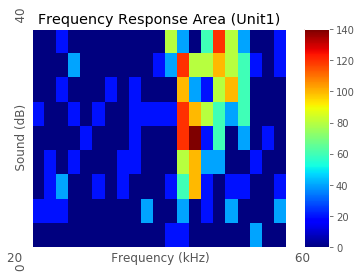

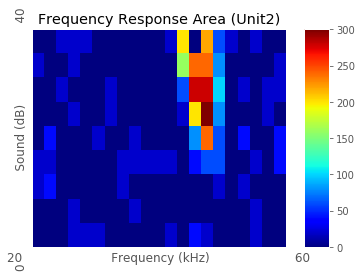

In [116]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
for i in range(2):
    plt.figure()
    ax = plt.gca()
    im = ax.imshow(fra[i],cmap='jet')
    ax.set_title('Frequency Response Area (Unit'+str(i+1)+')')
    ax.set_xlabel('20                       Frequency (kHz)                      60')
    ax.set_ylabel('0                        Sound (dB)                     40')
    ax.set_xticks([])
    ax.set_yticks([])
    # create an axes on the right side of ax. The width of cax will be 5%
    # of ax and the padding between cax and ax will be fixed at 0.05 inch.
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="10%", pad=0.25)
    cax.set_ylabel('Spike Number')
    plt.colorbar(im, cax=cax)

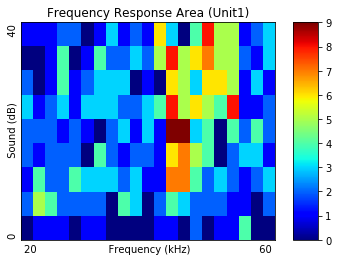

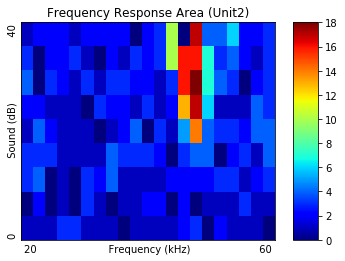

In [206]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
for i in range(2):
    plt.figure()
    ax = plt.gca()
    im = ax.imshow(fra[i],cmap='jet')
    ax.set_title('Frequency Response Area (Unit'+str(i+1)+')')
    ax.set_xlabel('20                       Frequency (kHz)                      60')
    ax.set_ylabel('0                        Sound (dB)                     40')
    ax.set_xticks([])
    ax.set_yticks([])
    # create an axes on the right side of ax. The width of cax will be 5%
    # of ax and the padding between cax and ax will be fixed at 0.05 inch.
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="10%", pad=0.25)
    cax.set_ylabel('Spike Number')
    plt.colorbar(im, cax=cax)